In [63]:
import pandas as pd

In [64]:
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import tensorflow as tf

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터셋 불러오기
(x_train, y_class_train), (x_test, y_class_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

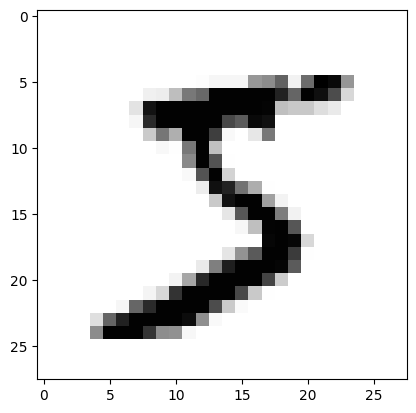

In [65]:
import matplotlib.pyplot  as plt

plt.imshow(x_train[0], cmap = "Greys")
plt.show()

In [66]:
for x in x_train[0] :
    for i in x :
        sys.stdout.write("%d\t" % i)
    sys.stdout.write("\n")

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [67]:
# 28 x 28 2차원 데이터를 784개의 1차원 데이터로 바꿔주면 784개의 속성으로 이용 가능하다.
# 차원 변환 과정(2차원 -> 1차원)
x_train = x_train.reshape(x_train.shape[0], 784)

# 케라스는 데이터가 0~1 사이 값일 때 최적의 성능으로 예측함
# 데이터 정규화(normalization) : 255로 나눠준다
x_train = x_train.astype("float64")     # 현재 정수형이므로 실수형으로 바꾼 후 정규화를 실행한다
x_train = x_train / 255

# 테스트셋에도 정규화 작업
x_test = x_test.reshape(x_test.shape[0], 784).astype("float64") / 255

In [68]:
# 클래스 값 확인
print("class : %d" % (y_class_train[0]))

# 현재 클래스를 0~9 정수값에서 0 or 1인 벡터로 수정해야 함
y_train = tf.keras.utils.to_categorical(y_class_train, 10)
y_test = tf.keras.utils.to_categorical(y_class_test, 10)

print(y_train[0])

class : 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [69]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 차원 축소, 정규화
x_train = x_train.reshape(x_train.shape[0], 784).astype("float32") / 255
x_test = x_test.reshape(x_test.shape[0], 784).astype("float32") / 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [70]:
# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim = 784, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

# 모델 실행 환경 설정
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

# 모델 저장, 모델 최적화 단계에서 학습 자동 중단 설정
MODEL_DIR = "./model/"
if not os.path.exists(MODEL_DIR) :
    os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = "val_loss", \
                               verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = "val_loss", patience = 10)

In [71]:
# 모델의 실행
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 30, batch_size = 200, verbose = 0, 
                    callbacks = [early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.14664, saving model to ./model\01-0.1466.hdf5

Epoch 2: val_loss improved from 0.14664 to 0.10231, saving model to ./model\02-0.1023.hdf5

Epoch 3: val_loss improved from 0.10231 to 0.09059, saving model to ./model\03-0.0906.hdf5

Epoch 4: val_loss improved from 0.09059 to 0.07852, saving model to ./model\04-0.0785.hdf5

Epoch 5: val_loss improved from 0.07852 to 0.07552, saving model to ./model\05-0.0755.hdf5

Epoch 6: val_loss improved from 0.07552 to 0.06680, saving model to ./model\06-0.0668.hdf5

Epoch 7: val_loss improved from 0.06680 to 0.06648, saving model to ./model\07-0.0665.hdf5

Epoch 8: val_loss improved from 0.06648 to 0.06119, saving model to ./model\08-0.0612.hdf5


KeyboardInterrupt: 

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

313/313 [==============================] - 1s 2ms/step - loss: 0.0668 - accuracy: 0.9834

 test Accuracy : 0.9834


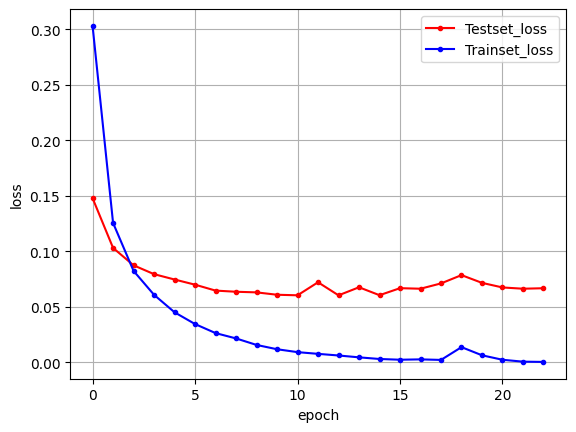

In [ ]:
# 테스트 정확도 출력
print("\n test Accuracy : %.4f" % (model.evaluate(x_test, y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history["val_loss"]

# 학습셋의 오차
y_loss = history.history["loss"]

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = ".", c = "red", label = "Testset_loss")
plt.plot(x_len, y_loss, marker = ".", c = "blue", label = "Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = "upper right")

# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [78]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32") / 255
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = "relu"))
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [79]:
## 모델 저장, 모델 최적화 단계에서 early stop

MODEL_DIR= './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer=ModelCheckpoint(filepath=modelpath,monitor='val_loss',
                             verbose=1,save_best_only=True)
early_stopping_callback =EarlyStopping(monitor='val_loss',patience=10)


Epoch 1: val_loss improved from inf to 0.05556, saving model to ./model\01-0.0556.hdf5

Epoch 2: val_loss improved from 0.05556 to 0.03990, saving model to ./model\02-0.0399.hdf5

Epoch 3: val_loss improved from 0.03990 to 0.03499, saving model to ./model\03-0.0350.hdf5

Epoch 4: val_loss improved from 0.03499 to 0.03138, saving model to ./model\04-0.0314.hdf5

Epoch 5: val_loss did not improve from 0.03138

Epoch 6: val_loss did not improve from 0.03138

Epoch 7: val_loss improved from 0.03138 to 0.02727, saving model to ./model\07-0.0273.hdf5

Epoch 8: val_loss did not improve from 0.02727

Epoch 9: val_loss did not improve from 0.02727

Epoch 10: val_loss did not improve from 0.02727

Epoch 11: val_loss did not improve from 0.02727

Epoch 12: val_loss did not improve from 0.02727

Epoch 13: val_loss improved from 0.02727 to 0.02654, saving model to ./model\13-0.0265.hdf5

Epoch 14: val_loss did not improve from 0.02654

Epoch 15: val_loss did not improve from 0.02654

Epoch 16: val

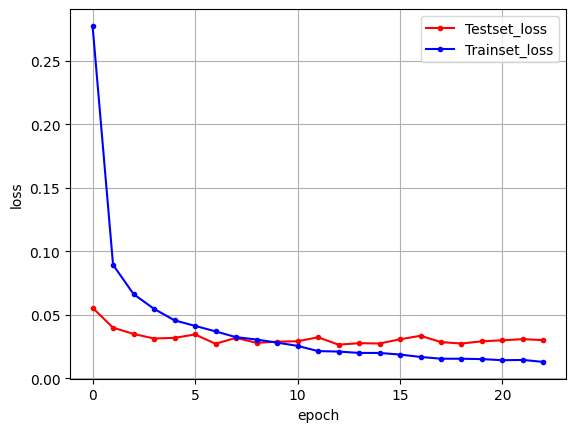

In [80]:
history= model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=30,batch_size=200,verbose=0,
                   callbacks=[early_stopping_callback,checkpointer])
# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' %(model.evaluate(X_test,Y_test)[1]))

# 테스트셋 오차
y_vloss= history.history['val_loss']

# 트레인셋 오차
y_loss= history.history['loss']

# 그래프
X_len=np.arange(len(y_loss))
plt.plot(X_len, y_vloss, marker='.', c='red', label= 'Testset_loss')
plt.plot(X_len, y_loss, marker='.', c='blue', label= 'Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()